In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [2]:
df = pd.read_csv('/home/evelin/Downloads/movies.csv')

In [3]:
#df.dropa(subset=['genre'])

In [4]:
df.set_index('filename', inplace=True)
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,IMDB_ID,genre,year,production_region,corpus,duration,...,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,mean_sentence_length,type_token_ratio,text_length,originalTitleLang
filename,,,,,,,,,,,,,,,,,,,,,
6416324.xml,0,0,706,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,...,0.0,1943.0,NaN,90.0,7.0,80.0,7.388194,0.234441,8484,fr
4732286.xml,1,1,2784,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,...,0.0,1966.0,NaN,75.0,5.8,36.0,5.990902,0.293297,5520,de
6122081.xml,2,2,3085,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,...,0.0,1967.0,NaN,78.0,7.0,34.0,5.822102,0.326870,3249,fr
5594522.xml,3,3,6044,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82.0,...,0.0,1978.0,NaN,82.0,6.2,31.0,8.100000,0.296330,3297,en
5618549.xml,4,4,6281,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,...,0.0,1979.0,NaN,96.0,5.7,44.0,5.902730,0.354112,2663,ro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007863.xml,3724,3724,61169,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,...,0.0,2017.0,NaN,106.0,6.7,6489.0,5.688843,0.265621,4273,en
7036888.xml,3725,3725,61184,NETFLIX PRÄSENTIERT - Mr. Moody ? - Ja . - Tut...,tt6598626,"Comedy,Crime",2017.0,NaN,untokenisiert,83.0,...,0.0,2017.0,NaN,83.0,6.1,3596.0,6.616143,0.242737,5714,en
6984880.xml,3726,3726,61244,EINE NETFLIX ORIGINAL DOKUMENTATION Wir müssen...,tt6714534,"Biography,Documentary",2017.0,NaN,untokenisiert,92.0,...,0.0,2017.0,NaN,92.0,7.4,6030.0,9.419395,0.255061,12448,da


In [5]:
df['main_genre'] = df.genre.str.split(',')

In [6]:
dff = df.main_genre
dff

filename
6416324.xml    [Adventure, Drama, History]
4732286.xml                       [Comedy]
6122081.xml                        [Drama]
5594522.xml            [Action, Adventure]
5618549.xml                       [Action]
                          ...             
7007863.xml            [Animation, Sci-Fi]
7036888.xml                [Comedy, Crime]
6984880.xml       [Biography, Documentary]
7000718.xml             [Sci-Fi, Thriller]
7017079.xml                            NaN
Name: main_genre, Length: 3729, dtype: object

In [7]:
dff_f = dff.dropna()
#dff_f = dff.drop_duplicates()
dff_f

filename
6416324.xml    [Adventure, Drama, History]
4732286.xml                       [Comedy]
6122081.xml                        [Drama]
5594522.xml            [Action, Adventure]
5618549.xml                       [Action]
                          ...             
7063865.xml               [Drama, Romance]
7007863.xml            [Animation, Sci-Fi]
7036888.xml                [Comedy, Crime]
6984880.xml       [Biography, Documentary]
7000718.xml             [Sci-Fi, Thriller]
Name: main_genre, Length: 3722, dtype: object

In [8]:
dff_f = dff_f.apply(lambda x: x[0])
dff_f

filename
6416324.xml    Adventure
4732286.xml       Comedy
6122081.xml        Drama
5594522.xml       Action
5618549.xml       Action
                 ...    
7063865.xml        Drama
7007863.xml    Animation
7036888.xml       Comedy
6984880.xml    Biography
7000718.xml       Sci-Fi
Name: main_genre, Length: 3722, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df.text)

In [10]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(X_tfidf)

In [11]:
Xr_tfidf

array([[-0.88354236,  5.426525  ],
       [-0.5858957 ,  7.1718364 ],
       [-3.6333914 ,  9.976633  ],
       ...,
       [ 1.7184566 ,  6.944235  ],
       [-1.0490695 ,  5.523264  ],
       [-0.22365229,  8.468645  ]], dtype=float32)

In [12]:
Xr_tfidf.shape

(3729, 2)

In [13]:
dff_f

filename
6416324.xml    Adventure
4732286.xml       Comedy
6122081.xml        Drama
5594522.xml       Action
5618549.xml       Action
                 ...    
7063865.xml        Drama
7007863.xml    Animation
7036888.xml       Comedy
6984880.xml    Biography
7000718.xml       Sci-Fi
Name: main_genre, Length: 3722, dtype: object

In [14]:
df["main_single_genre"] = dff_f

In [15]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,IMDB_ID,genre,year,production_region,corpus,duration,...,endYear,runtimeMinutes,averageRating,numVotes,mean_sentence_length,type_token_ratio,text_length,originalTitleLang,main_genre,main_single_genre
filename,,,,,,,,,,,,,,,,,,,,,
6416324.xml,0,0,706,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,...,NaN,90.0,7.0,80.0,7.388194,0.234441,8484,fr,"[Adventure, Drama, History]",Adventure
4732286.xml,1,1,2784,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,...,NaN,75.0,5.8,36.0,5.990902,0.293297,5520,de,[Comedy],Comedy
6122081.xml,2,2,3085,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,...,NaN,78.0,7.0,34.0,5.822102,0.326870,3249,fr,[Drama],Drama
5594522.xml,3,3,6044,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82.0,...,NaN,82.0,6.2,31.0,8.100000,0.296330,3297,en,"[Action, Adventure]",Action
5618549.xml,4,4,6281,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,...,NaN,96.0,5.7,44.0,5.902730,0.354112,2663,ro,[Action],Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007863.xml,3724,3724,61169,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,...,NaN,106.0,6.7,6489.0,5.688843,0.265621,4273,en,"[Animation, Sci-Fi]",Animation
7036888.xml,3725,3725,61184,NETFLIX PRÄSENTIERT - Mr. Moody ? - Ja . - Tut...,tt6598626,"Comedy,Crime",2017.0,NaN,untokenisiert,83.0,...,NaN,83.0,6.1,3596.0,6.616143,0.242737,5714,en,"[Comedy, Crime]",Comedy
6984880.xml,3726,3726,61244,EINE NETFLIX ORIGINAL DOKUMENTATION Wir müssen...,tt6714534,"Biography,Documentary",2017.0,NaN,untokenisiert,92.0,...,NaN,92.0,7.4,6030.0,9.419395,0.255061,12448,da,"[Biography, Documentary]",Biography


# Visualization all Data

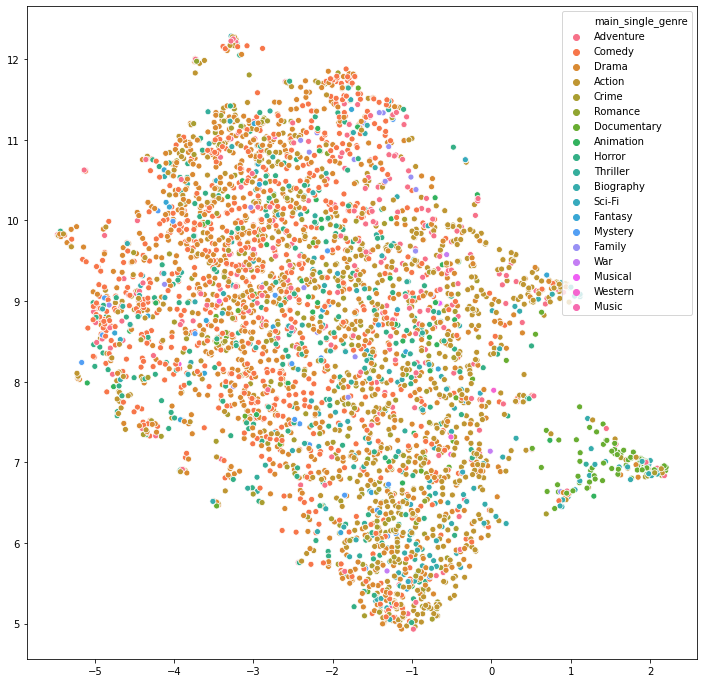

In [16]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_single_genre'])
plt.show()

In [17]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df.main_single_genre.loc[df.main_single_genre == "Crime"])


In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=19)
kmeans.fit(X_tfidf)
y_kmeans = kmeans.predict(X_tfidf)

In [20]:
from umap import UMAP 
reducer = UMAP()
Xrr_tfidf = reducer.fit_transform(X_tfidf)

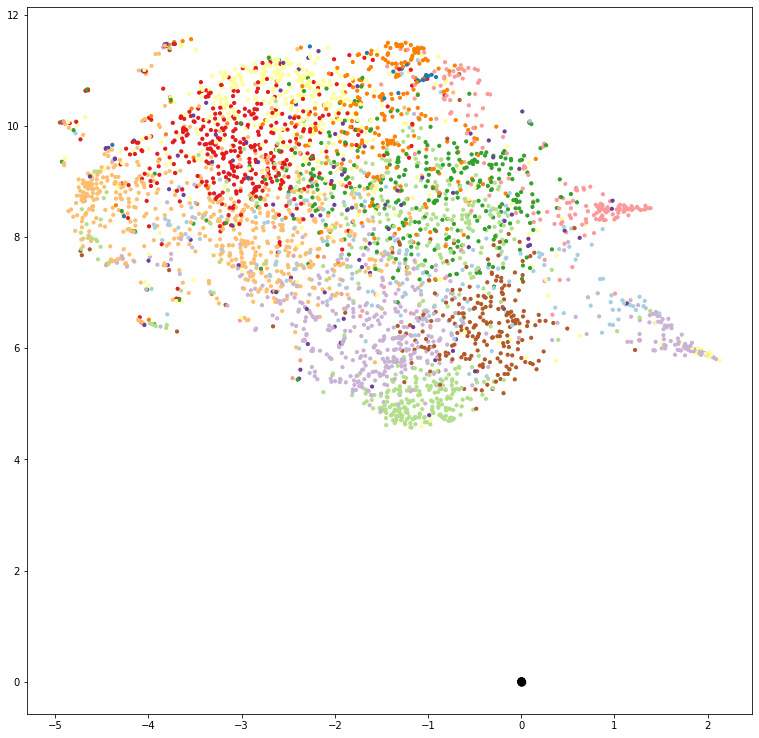

In [21]:
plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)



In [22]:
df['clusterID'] = kmeans.labels_

In [23]:
df.clusterID

filename
6416324.xml     3
4732286.xml    17
6122081.xml     8
5594522.xml     5
5618549.xml     5
               ..
7007863.xml     4
7036888.xml     3
6984880.xml    12
7000718.xml     3
7017079.xml     1
Name: clusterID, Length: 3729, dtype: int32

In [24]:
d=df.T

In [25]:
d.loc[["main_single_genre", "clusterID"]]

filename,6416324.xml,4732286.xml,6122081.xml,5594522.xml,5618549.xml,4208202.xml,6254411.xml,4662660.xml,5116660.xml,6235492.xml,...,7040848.xml,7057670.xml,7010381.xml,7017380.xml,7063865.xml,7007863.xml,7036888.xml,6984880.xml,7000718.xml,7017079.xml
main_single_genre,Adventure,Comedy,Drama,Action,Action,Action,Drama,Crime,Drama,Romance,...,Documentary,Documentary,Documentary,Documentary,Drama,Animation,Comedy,Biography,Sci-Fi,NaN
clusterID,3,17,8,5,5,3,5,10,8,8,...,12,12,12,12,1,4,3,12,3,1


In [26]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import squareform

In [27]:
#vereinfachte Methode:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

In [28]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Xr_tfidf)

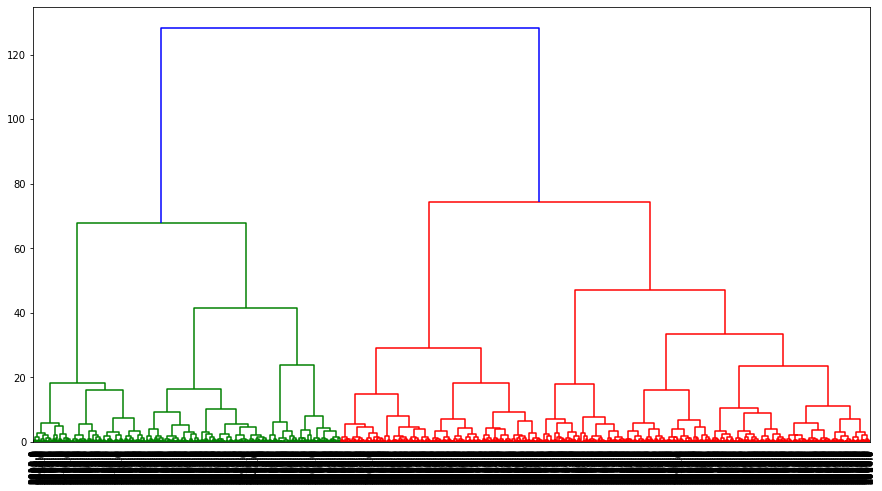

In [29]:
lmatrix = linkage_matrix(Xr_tfidf.shape[0], model.children_, model.distances_)
plt.figure(figsize=(15,8))
dendrogram(lmatrix, labels=df['year'].values, leaf_font_size=10); #

In [ ]:
df_c = df.loc[df.genre == "Comedy"]

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf_c = tfidf.fit_transform(df_c.text)

In [ ]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf_c = reducer.fit_transform(X_tfidf_c)

In [ ]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Xr_tfidf_c)

In [ ]:
lmatrix = linkage_matrix(Xr_tfidf_c.shape[0], model.children_, model.distances_)
plt.figure(figsize=(15,8))
dendrogram(lmatrix, labels=df['year'].values, leaf_font_size=10); #